<a href="https://colab.research.google.com/github/JParraArias/SignalsAndSystems2024-2/blob/main/Audio_detector_Parcial%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simulación Punto #4

In [1]:
#instalar librerias necesarias para descargar audios youtube
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile

import os
import yt_dlp as youtube_dl

#funcion para descargar mp3 desde youtube
def download_ytvid_as_mp3(video_url,name):
    #video_url = input("enter url of youtube video:")
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

    print("Download complete... {}".format(filename))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 9.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for yt-dlp: filename=yt_dlp-2025.1.26-py3-none-any.whl size=2931853 sha256=5caafbd3f0f1fc8304c8917cfdd6323bfeb46282cc015a9586c285cd0e4a8355
  Stored in directory: /tmp/pip-ephem-wheel-cache-nmwdw3ff/wheels/2d/79/97/7209650ef73114e0fe0603480da012ad3afacb9cae6b8acd9a
Successfully built yt-dlp


In [2]:
#cargar datos desde drive acceso libre
FILEID = "18S3b3P2ApgTJMCdP6KBS5P0mQpJ5A4iz"


!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O  audios.xlsx && rm -rf /tmp/cookies.txt
#!unzip -o codigos.zip
!dir

--2025-02-13 21:43:29--  https://docs.google.com/uc?export=download&confirm=&id=18S3b3P2ApgTJMCdP6KBS5P0mQpJ5A4iz
Resolving docs.google.com (docs.google.com)... 172.253.117.102, 172.253.117.113, 172.253.117.139, ...
Connecting to docs.google.com (docs.google.com)|172.253.117.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=18S3b3P2ApgTJMCdP6KBS5P0mQpJ5A4iz&export=download [following]
--2025-02-13 21:43:29--  https://drive.usercontent.google.com/download?id=18S3b3P2ApgTJMCdP6KBS5P0mQpJ5A4iz&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.117.132, 2607:f8b0:400e:c0a::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.117.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15290 (15K) [application/octet-stream]
Saving to: ‘audios.xlsx’

audios.xlsx         100%[===================>]  14.93K  --.-

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_ = 'audios.xlsx'#leer archivo xlsx con link, band, type
X  = pd.read_excel(file_)
X#imprimir filas iniciales

,link,band,type,type_num
0,https://youtu.be/77csUK9yKRk,Juan M,Correcta,1
1,https://youtu.be/3rrZOrAYWs0,Juan M,Correcta,1
2,https://youtu.be/77Hupis8K5E,Juan M,Correcta,1
3,https://youtu.be/t0ZKjT3bFGA,Juan M,Correcta,1
4,https://youtu.be/IXODRKDWdc4,Juan M,Correcta,1
...,...,...,...,...
120,https://youtu.be/Df8VhfJK-0k,Leandro,Incorrecta,2
121,https://youtu.be/1ktSqDaJH5Y,Leandro,Incorrecta,2
122,https://youtu.be/Me2NDGlUeZg,Leandro,Incorrecta,2
123,https://youtu.be/sRL4uOnCrOs,Leandro,Incorrecta,2


In [4]:
import subprocess
import os

#crear carpeta con resultados
try:
  os.mkdir('results')
except:
  print("Carpeta results ya existe")

#recorrer excel con videos
N, P = X.shape
Ns = N * 5 #cantidad de segmentos por cancion

for n in range(N):
    print(f"video {n+1} de {N}")
    print(f"link: {X.loc[n,'link']}\n")
    print(f"band: {X.loc[n,'band']}\n")
    print(f"type: {X.loc[n,'type']}\n")
    #ruta video n-th
    name_ = 'results/'+X.loc[n,'band']+"_"+str(n)+"_"+str(X.loc[n,'type_num']) # #video+nombre+tipo de genero musical
    #descargar mp3 desde youtube
    download_ytvid_as_mp3(X.loc[n,'link'],name_)
    #convertir a .wav
    subprocess.call(['ffmpeg','-y', '-i', name_+'.mp3',
                   name_+'.wav'])

video 1 de 125
link: https://youtu.be/77csUK9yKRk

band: Juan M

type: Correcta

[youtube] Extracting URL: https://youtu.be/77csUK9yKRk
[youtube] 77csUK9yKRk: Downloading webpage
[youtube] 77csUK9yKRk: Downloading tv client config
[youtube] 77csUK9yKRk: Downloading player e7567ecf
[youtube] 77csUK9yKRk: Downloading tv player API JSON
[youtube] 77csUK9yKRk: Downloading ios player API JSON
[youtube] 77csUK9yKRk: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=77csUK9yKRk
[youtube] 77csUK9yKRk: Downloading webpage
[youtube] 77csUK9yKRk: Downloading tv client config
[youtube] 77csUK9yKRk: Downloading player e7567ecf
[youtube] 77csUK9yKRk: Downloading tv player API JSON
[youtube] 77csUK9yKRk: Downloading ios player API JSON
[youtube] 77csUK9yKRk: Downloading m3u8 information
[info] 77csUK9yKRk: Downloading 1 format(s): 251
[download] Destination: results/Juan M_0_1.mp3
[download] 100% of   39.78KiB in 00:00:00 at 191.90KiB/s 
Download complete... resul

In [5]:
#cargar .wavs y partir audios
#lista archivos .wav
path = 'results/'
wav_files = [f for f in os.listdir(path) if f.endswith('.wav')]
wav_files

['Leandro_49_1.wav',
 'Leandro_106_2.wav',
 'Leandro_64_1.wav',
 'Leandro_105_2.wav',
 'Leandro_58_1.wav',
 'Juan M_15_1.wav',
 'Cristian_41_2.wav',
 'Juan M_17_1.wav',
 'Leandro_124_2.wav',
 'Cristian_93_1.wav',
 'Juan M_16_1.wav',
 'Leandro_61_1.wav',
 'Juan M_5_1.wav',
 'Juan M_10_1.wav',
 'Juan M_22_1.wav',
 'Cristian_91_1.wav',
 'Juan M_74_2.wav',
 'Juan M_84_2.wav',
 'Juan M_82_2.wav',
 'Juan M_12_1.wav',
 'Cristian_37_2.wav',
 'Juan M_11_1.wav',
 'Cristian_92_1.wav',
 'Cristian_23_1.wav',
 'Leandro_121_2.wav',
 'Leandro_57_1.wav',
 'Cristian_31_1.wav',
 'Leandro_48_1.wav',
 'Juan M_21_1.wav',
 'Juan M_79_2.wav',
 'Juan M_83_2.wav',
 'Juan M_80_2.wav',
 'Leandro_122_2.wav',
 'Juan M_4_1.wav',
 'Juan M_8_1.wav',
 'Leandro_56_1.wav',
 'Cristian_35_2.wav',
 'Cristian_28_1.wav',
 'Juan M_70_2.wav',
 'Leandro_108_2.wav',
 'Cristian_36_2.wav',
 'Juan M_13_1.wav',
 'Cristian_88_1.wav',
 'Juan M_69_2.wav',
 'Cristian_104_2.wav',
 'Juan M_2_1.wav',
 'Juan M_77_2.wav',
 'Cristian_102_2.wav

In [6]:
!pip install soundfile #instalar sondfile

In [7]:
import numpy as np
import soundfile as sf  # Para instalar: pip install soundfile

# Parámetros
fs = 48000  # Frecuencia de muestreo esperada
ts = 3  # Duración del segmento en segundos
tl = np.array([0])  # Solo un punto de inicio (0 segundos), ya que los audios son cortos
Ns = len(wav_files) * len(tl)  # Cantidad de segmentos (uno por audio)
x_t = np.zeros((Ns, int(ts * fs), 2))  # Ns segmentos, cantidad de muestras, 2 canales (stereo)
label = np.zeros((Ns, 1))  # Vector tipo de género
name_c = []

# Leer archivos wav
i = 0
for name in wav_files:
    # Leer archivo de audio
    x, file_fs = sf.read(path + name)

    # Verificar si la frecuencia de muestreo es diferente de la esperada
    if file_fs != fs:
        print(f"Advertencia: {name} tiene una frecuencia de muestreo {file_fs}, esperada {fs}.")
        continue  # Saltar este archivo

    # Verificar si el archivo tiene menos de 3 segundos
    audio_duration = x.shape[0] / file_fs  # Duración en segundos
    if audio_duration < ts:
        # Rellenar con ceros para que tenga exactamente 3 segundos
        padding = np.zeros((int(ts * fs) - x.shape[0], x.shape[1]))
        x = np.vstack((x, padding))
        print(f"Audio {name} rellenado con ceros (duración original: {audio_duration}s).")

    # Extraer segmento desde el inicio (0 segundos)
    start_idx = 0
    end_idx = int(ts * fs)
    segment = x[start_idx:end_idx, :]

    # Verificar si el archivo tiene 2 canales
    if segment.shape[1] != 2:
        print(f"Advertencia: {name} no tiene 2 canales. Se ignorará.")
        continue

    # Asignar segmento al conjunto final
    x_t[i] = segment
    label[i] = int(name[-5])  # Tipo de género (asumido como el quinto carácter desde el final del nombre)
    name_c += [name[:-6]]
    print(f"{i} lectura: {name}; segmento extraído; tipo música {label[i]}")
    i += 1

# Imprimir resultado final
print(f"Forma final de x_t: {x_t[:i].shape}")
print(f"Cantidad de segmentos procesados: {i}")


Audio Leandro_49_1.wav rellenado con ceros (duración original: 2.0201458333333333s).
0 lectura: Leandro_49_1.wav; segmento extraído; tipo música [1.]
Audio Leandro_106_2.wav rellenado con ceros (duración original: 2.298791666666667s).
1 lectura: Leandro_106_2.wav; segmento extraído; tipo música [2.]
Audio Leandro_64_1.wav rellenado con ceros (duración original: 2.1594583333333333s).
2 lectura: Leandro_64_1.wav; segmento extraído; tipo música [1.]
Audio Leandro_105_2.wav rellenado con ceros (duración original: 2.229125s).
3 lectura: Leandro_105_2.wav; segmento extraído; tipo música [2.]
Audio Leandro_58_1.wav rellenado con ceros (duración original: 2.2523541666666667s).
4 lectura: Leandro_58_1.wav; segmento extraído; tipo música [1.]
Audio Juan M_15_1.wav rellenado con ceros (duración original: 2.0906666666666665s).
5 lectura: Juan M_15_1.wav; segmento extraído; tipo música [1.]
6 lectura: Cristian_41_2.wav; segmento extraído; tipo música [2.]
Audio Juan M_17_1.wav rellenado con ceros (

In [8]:
from IPython.display import Audio #reproducir segmento
Audio(x_t[55].T,rate=fs)

In [9]:
#calculo de fourier
vf = np.fft.rfftfreq(x_t.shape[1],1/fs) #calculo vector de frecuencias
Xw = np.fft.rfft(x_t,axis=1).mean(axis=-1) #transformada rapida de Fourier para señal Real a lo largo del tiempo (axis=1) y se promedian los dos canales
Xw.shape

(125, 72001)

In [10]:
# Obtener la magnitud del espectro
Xw_mag = np.abs(Xw)

# Encontrar el índice de la frecuencia máxima por cada audio
idx_max_freq = np.argmax(Xw_mag, axis=1)

# Convertir índices a frecuencias
f_max = vf[idx_max_freq]

# Verificar si hay audios sin frecuencia dominante
if len(f_max) > 0:
    print(f"Frecuencia máxima promedio: {np.mean(f_max):.2f} Hz")
    print(f"Frecuencia máxima global: {np.max(f_max):.2f} Hz")
else:
    print("⚠️ No se encontraron frecuencias máximas.")

Frecuencia máxima promedio: 253.23 Hz
Frecuencia máxima global: 474.67 Hz


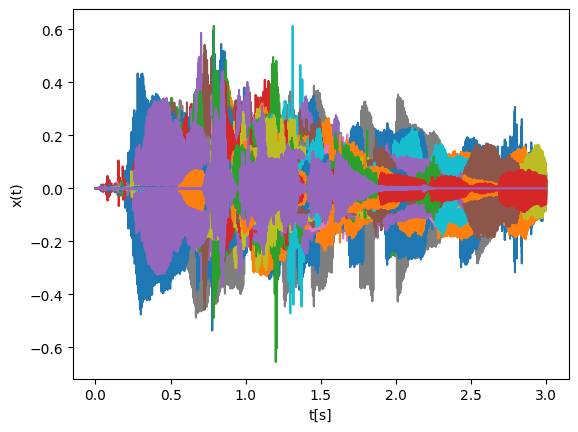

In [11]:
#grafica tiempo y fourier
plt.plot(np.arange(0,ts,1/fs),x_t.mean(axis=-1).T) #se promedian los dos canales stereo
plt.xlabel('t[s]')
plt.ylabel('x(t)')
plt.show()

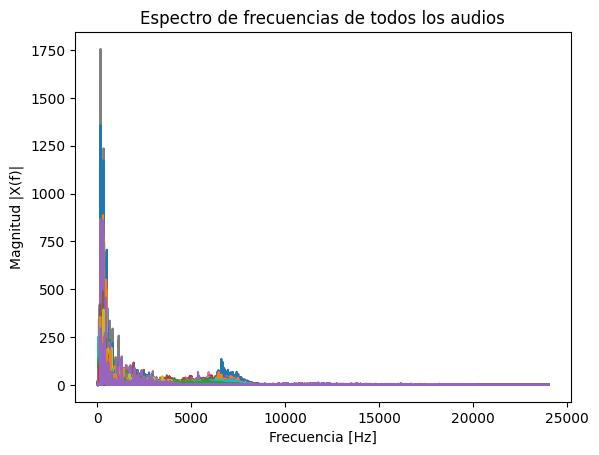

In [12]:
# Graficar el espectro de frecuencias para todos los audios
plt.plot(vf,abs(Xw).T)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud |X(f)|')
plt.title('Espectro de frecuencias de todos los audios')
plt.show()

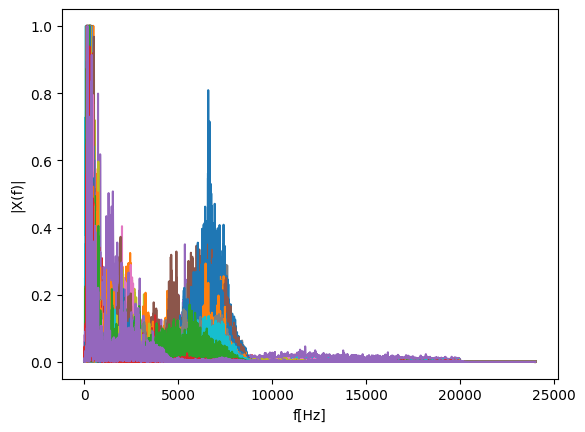

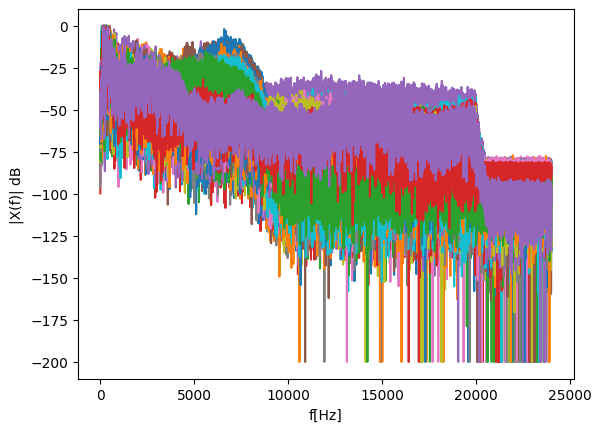

In [13]:
#se normalizan espectros entre 0 y 1 para evitar inconsistencias por ampliltudes máximas
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
Xw_ = sca.fit_transform(abs(Xw).T).T

plt.plot(vf,Xw_.T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

#en dB
plt.plot(vf,(20*np.log10(Xw_+1e-10)).T) # se suma 1e-10 para evitar discontinuidad del log
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)| dB')
plt.show()

In [43]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
#visualización de datos
red_ = TSNE(perplexity = 20,n_components=2,random_state=123,learning_rate='auto',init='pca')
#red_ = PCA(n_components=2,random_state=123)
fmax = 7000
X_2D = red_.fit_transform(Xw_[:,:fmax]) #se tiene en cuenta el espectro hasta fmax Hz

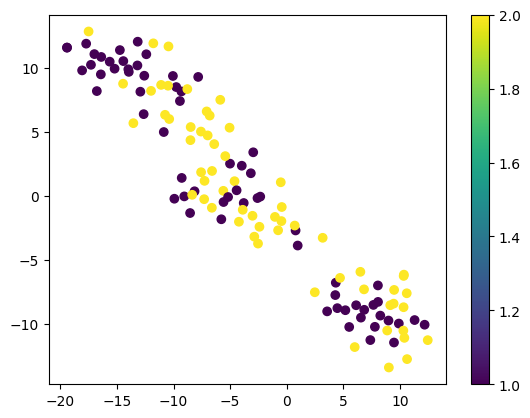

<ipython-input-44-6e94555dcd77>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.text(X_2D[i,0]*1.025,X_2D[i,1]*1.025, tex[:-2]+"_"+str(i), fontsize=6,color=color_[int(label[i]-1)])


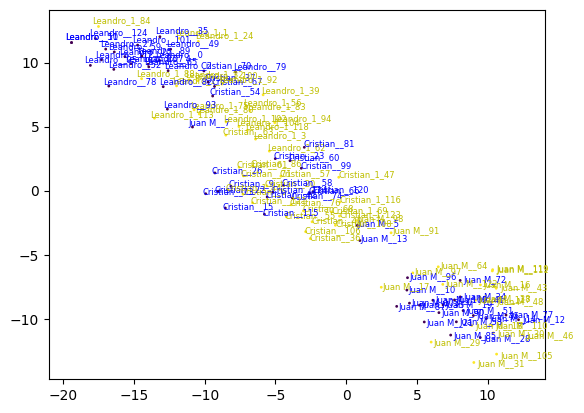

In [44]:
#graficar separabilidad 2D
plt.scatter(X_2D[:,0],X_2D[:,1],c=label)
plt.colorbar()
plt.show()

color_ = ["b","y"]
#nombre cancion
plt.scatter(X_2D[:,0],X_2D[:,1],c=label,s=1)
for i, tex in enumerate(name_c):
    #print(f"{i} {tex}")
    plt.text(X_2D[i,0]*1.025,X_2D[i,1]*1.025, tex[:-2]+"_"+str(i), fontsize=6,color=color_[int(label[i]-1)])

#plt.colorbar()
plt.show()

In [31]:
num_puntos = X_2D.shape[0]
print(f"Total de puntos en la gráfica: {num_puntos}")

Total de puntos en la gráfica: 125


In [32]:
#reproducir audio
i=55
Audio(x_t[i].T,rate=fs)

In [33]:
i = 18
Audio(x_t[i].T,rate=fs)

In [34]:
i = 64
Audio(x_t[i].T,rate=fs)

In [36]:
import joblib
#guardar modelo
if not os.path.exists('modelo'):
    os.mkdir('modelo')
filename_ = 'modelo/palabras_clave'
model_ ={'Xw_':Xw_,'fmax': fmax, 'label' : label, 'name_c' : name_c, 'vf':vf,'fs':fs}
joblib.dump(model_,filename_+".pkl")


['modelo/palabras_clave.pkl']

In [28]:
#descargar modelo
#guardar resultados
from google.colab import files
from datetime import date, datetime
import shutil
#guardar resultados
namefile = str(datetime.now().strftime("%Y_%m_%d_%H_%M_%d"))+'modelo'
shutil.make_archive(namefile, 'zip', 'modelo')
files.download(namefile+'.zip')

#el archivo .zip puede cargarse en drive y utilizarse en otro cuaderno para detectar género musical de nuevos segmentos

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
#cargar modelo
my_model_loaded = joblib.load(filename_+".pkl")
my_model_loaded.keys()

dict_keys(['Xw_', 'fmax', 'label', 'name_c', 'vf', 'fs'])



---



---



Saving Audio 9_L.mp4 to Audio 9_L (1).mp4


<ipython-input-38-1f2384bd87e9>:15: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(nuevo_audio, sr=None)  # Cargar con la frecuencia de muestreo original
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Reproduciendo: Audio 9_L (1).mp4


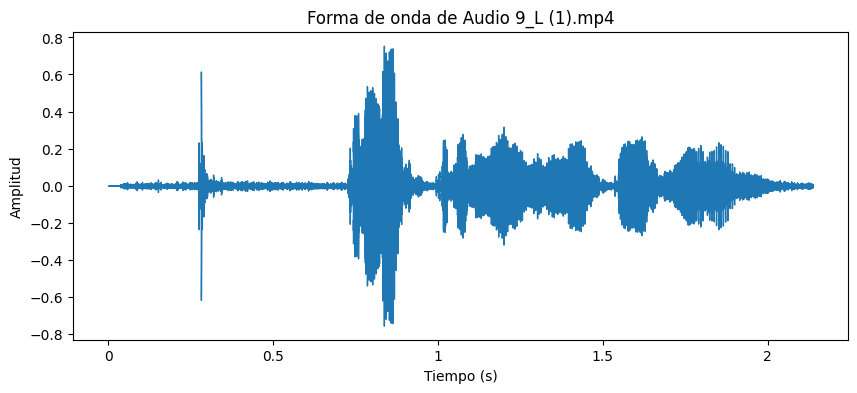

Shape del audio: (94208,)
Frecuencia de muestreo: 44100 Hz


In [38]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from google.colab import files
from IPython.display import Audio

# 1. Subir el archivo de audio
uploaded = files.upload()

# 2. Obtener el nombre del archivo subido
nuevo_audio = list(uploaded.keys())[0]  # Obtener el nombre del primer archivo subido

# 3. Cargar el audio
y, sr = librosa.load(nuevo_audio, sr=None)  # Cargar con la frecuencia de muestreo original

# 4. Reproducir el audio
print(f"Reproduciendo: {nuevo_audio}")
display(Audio(nuevo_audio, rate=sr))

# 5. Mostrar la forma de onda
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title(f"Forma de onda de {nuevo_audio}")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.show()

# 6. Mostrar el array de audio (shape)
print(f"Shape del audio: {y.shape}")
print(f"Frecuencia de muestreo: {sr} Hz")

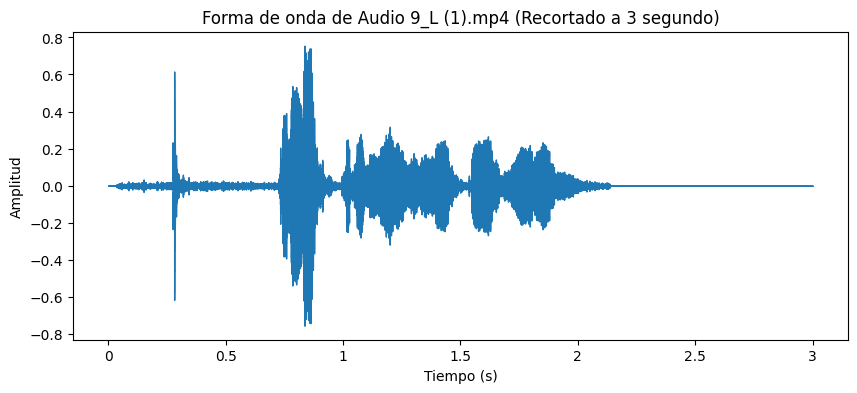

Shape del audio recortado: (132300,)


In [39]:
# 1. Definir la duración deseada en segundos
duracion_deseada = 3.0  # 3 segundos

# 2. Convertir la duración deseada en muestras
muestras_deseadas = int(duracion_deseada * sr)

# 3. Recortar o rellenar con ceros si es necesario
if len(y) > muestras_deseadas:
    y = y[:muestras_deseadas]  # Recortar
elif len(y) < muestras_deseadas:
    y = np.pad(y, (0, muestras_deseadas - len(y)))  # Rellenar con ceros

# 4. Graficar el audio recortado
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title(f"Forma de onda de {nuevo_audio} (Recortado a 3 segundo)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.show()

# Mostrar la nueva longitud del audio recortado
print(f"Shape del audio recortado: {y.shape}")

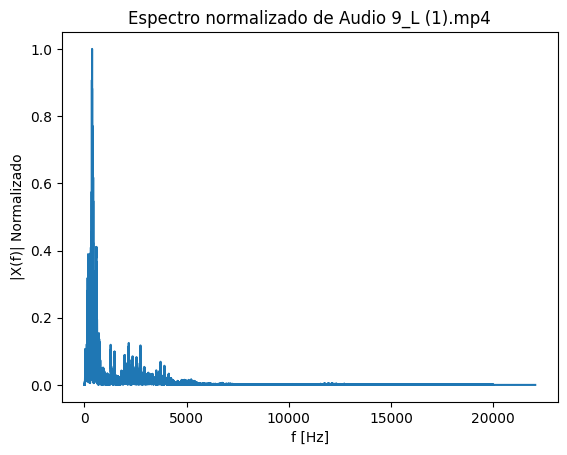

Espectro normalizado: [2.00977283e-03 2.09939794e-03 6.96354812e-04 ... 2.85373379e-05
 2.92275281e-05 1.81278111e-05]


In [92]:
from sklearn.preprocessing import MinMaxScaler
#se normalizan espectros entre 0 y 1 para evitar inconsistencias por ampliltudes máximas

# 1. Calcular la transformada rápida de Fourier (RFFT)
Xw_nuevo = np.fft.rfft(y)  # RFFT de la señal recortada

# 2. Obtener la magnitud del espectro
Xw_mag_nuevo = np.abs(Xw_nuevo)

# 3. Normalizar el espectro entre 0 y 1
sca = MinMaxScaler()
sca.fit_transform(abs(Xw).T).T

# 4. Graficar el espectro normalizado
vf_nuevo = np.fft.rfftfreq(len(y), 1/sr)  # Frecuencias correspondientes a la RFFT

plt.plot(vf_nuevo, Xw_nuevo_normalizado)
plt.xlabel('f [Hz]')
plt.ylabel('|X(f)| Normalizado')
plt.title(f"Espectro normalizado de {nuevo_audio}")
plt.show()

# Mostrar el espectro normalizado
print("Espectro normalizado:", Xw_nuevo_normalizado)


In [108]:
from scipy.spatial.distance import cdist
#def cdis(spectrum1, spectrum2):
 #   return 1 - cosine(spectrum1, spectrum2)

In [109]:
my_model_loaded['Xw_'].flatten()

array([2.60001499e-03, 2.91470944e-03, 2.77127819e-03, ...,
       5.52626187e-06, 1.39818778e-05, 1.30847367e-05])

In [110]:
Xw_nuevo_normalizado.flatten()

array([2.00977283e-03, 2.09939794e-03, 6.96354812e-04, ...,
       2.85373379e-05, 2.92275281e-05, 1.81278111e-05])

In [113]:
print(my_model_loaded['Xw_'].shape)
print(Xw_nuevo_normalizado.shape)

(125, 72001)
(66151,)


In [111]:
similarity = cdist(my_model_loaded['Xw_'], Xw_nuevo_normalizado.respape(1,-1), metric='euclidean')

ValueError: XA must be a 2-dimensional array.

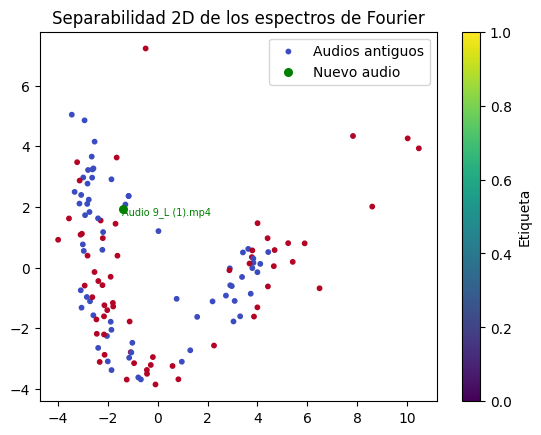

In [41]:
# Determinar el número máximo de puntos en el espectro
max_len = Xw_.shape[1]

# Ajustar la longitud del espectro del nuevo audio para que coincida con los antiguos
Xw_nuevo_normalizado_resized = np.pad(Xw_nuevo_normalizado[:fmax], (0, max_len - Xw_nuevo_normalizado[:fmax].shape[0]), mode='constant')

# Concatenar todos los espectros de Fourier antiguos con el nuevo audio ajustado
X_combined = np.concatenate([Xw_, Xw_nuevo_normalizado_resized.reshape(1, -1)], axis=0)

# Concatenar todas las etiquetas de los audios antiguos con la etiqueta del nuevo audio
label_combined = np.concatenate([label.flatten(), np.array([2])])

# Usar PCA para reducir la dimensión
red_ = PCA(n_components=2, random_state=123)
X_2D = red_.fit_transform(X_combined)

# Visualización en 2D
plt.figure

# Graficar los audios antiguos
plt.scatter(X_2D[:-1, 0], X_2D[:-1, 1], c=label_combined[:-1], s=10, cmap='coolwarm', label='Audios antiguos')

# Graficar el nuevo audio
plt.scatter(X_2D[-1, 0], X_2D[-1, 1], c='g', s=30, label='Nuevo audio')  # Usar color verde para el nuevo audio

# Añadir texto con el nombre del nuevo archivo
plt.text(X_2D[-1, 0] * 1.03, X_2D[-1, 1] * 1.03, f"{nuevo_audio}", fontsize=7, color='g', ha='left', va='top')

# Mostrar colorbar y etiquetas
plt.colorbar(label='Etiqueta')
plt.title('Separabilidad 2D de los espectros de Fourier')
plt.legend()
plt.show()

In [42]:
from scipy.spatial.distance import cdist
import numpy as np

# Extraer las representaciones 2D de los audios antiguos (sin incluir el nuevo audio)
X_old = X_2D[:-1]  # Todos los puntos menos el último
labels_old = label_combined[:-1]  # Etiquetas de los audios antiguos

# Obtener las coordenadas 2D del nuevo audio
X_new = X_2D[-1].reshape(1, -1)  # El nuevo audio es el último punto

# Calcular las distancias entre el nuevo audio y todos los anteriores
distances = cdist(X_new, X_old, metric='euclidean')  # Usamos la distancia euclidiana

# Encontrar el índice de la distancia mínima
index_closer = np.argmin(distances)  # Índice del audio más cercano

# Obtener la etiqueta del audio más cercano
closest_label = labels_old[index_closer]

# Definir un umbral de distancia para aceptación
umbral_distancia = 0.25  # Ajusta este valor según tus necesidades

# Verificar si el nuevo audio está más cerca del grupo con etiqueta 1 y si la distancia es menor que el umbral
if closest_label == 1 and distances[0, index_closer] < umbral_distancia:
    print("✅ Audio ACEPTADO")
else:
    print("❌ Audio RECHAZADO")


✅ Audio ACEPTADO
